In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/pre_train.csv', index_col=0)

In [3]:
data['is_converted'] = data['is_converted'].astype(int)

In [29]:
data['is_converted'].value_counts(normalize=True)

is_converted
0    0.918211
1    0.081789
Name: proportion, dtype: float64

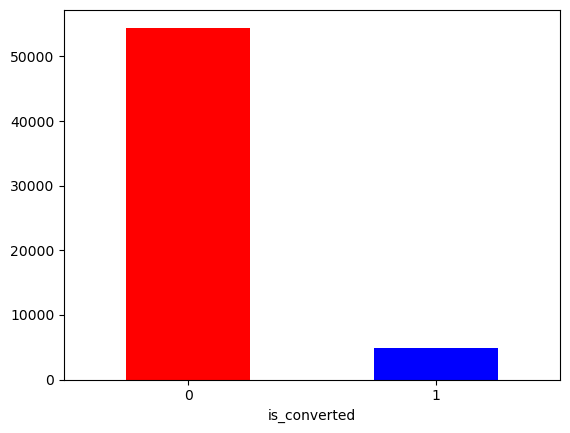

In [13]:
data['is_converted'].value_counts().plot(kind='bar', color=['r', 'b'])
plt.xticks(rotation = 0)
plt.show()


In [16]:
X = data.drop(columns= 'is_converted')
y = data['is_converted']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.3, stratify=y)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

In [23]:
from sklearn.metrics import f1_score
print('f1_score :', f1_score(y_test, y_pred))

f1_score : 0.4176559103828791


DecisionTree

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
dt_clf = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth' : np.arange(10, 20, 1), 'min_samples_leaf' : np.arange(10, 20, 1), 'criterion' : ['gini', 'entropy']}
grid_dt_clf = GridSearchCV(dt_clf, param_grid, verbose = True, cv = 5)
grid_dt_clf.fit(X_train, y_train)

print('최적의 파라미터 :',grid_dt_clf.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
최적의 파라미터 : {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 15}


In [6]:
dt_clf = DecisionTreeClassifier(max_depth=13, min_samples_leaf = 15, random_state=42, criterion='gini')
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)
print('f1_score :', f1_score(y_test, y_pred))

f1_score : 0.4788732394366197


RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print('f1_score :', f1_score(y_test, y_pred))

f1_score : 0.5205930807248764


In [13]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [22]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {'max_depth' : np.arange(5, 20, 2), 'min_samples_leaf' : np.arange(5, 20, 2), 'n_estimators' : np.arange(100, 500, 50)}
grid_rf_clf = GridSearchCV(rf_clf, param_grid, verbose = True, cv = 3)
grid_rf_clf.fit(X_train, y_train)

print('최적의 파라미터 :', grid_rf_clf.best_params_)

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
최적의 파라미터 : {'max_depth': 19, 'min_samples_leaf': 5, 'n_estimators': 450}


In [23]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {'max_depth' : np.arange(15, 25, 2), 'min_samples_leaf' : np.arange(1, 10, 2), 'n_estimators' : np.arange(400, 600, 50)}
grid_rf_clf = GridSearchCV(rf_clf, param_grid, verbose = True, cv = 3)
grid_rf_clf.fit(X_train, y_train)

print('최적의 파라미터 :', grid_rf_clf.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
최적의 파라미터 : {'max_depth': 19, 'min_samples_leaf': 1, 'n_estimators': 500}


In [25]:
rf_clf = RandomForestClassifier(max_depth=19, min_samples_leaf=1, random_state=42, n_estimators=500)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print('f1_score :', f1_score(y_test, y_pred))

f1_score : 0.5279661016949153


### 언더샘플링

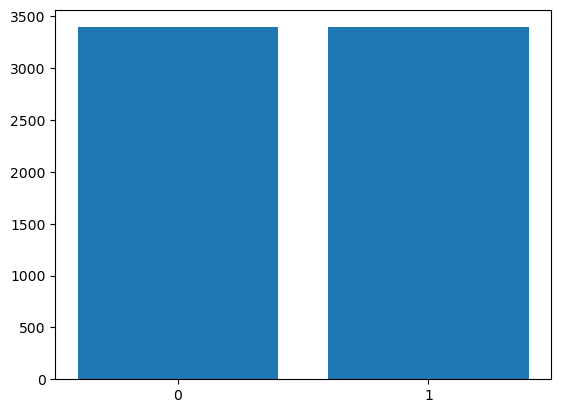

In [18]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)

plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values)
plt.xticks(y_resampled.value_counts().index)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {'max_depth' : np.arange(5, 20, 2), 'min_samples_leaf' : np.arange(5, 20, 2), 'n_estimators' : np.arange(100, 500, 50)}
grid_rf_clf = GridSearchCV(rf_clf, param_grid, verbose = True, cv = 3, scoring='f1')
grid_rf_clf.fit(X_resampled, y_resampled)

print('최적의 파라미터 :', grid_rf_clf.best_params_)

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
최적의 파라미터 : {'max_depth': 17, 'min_samples_leaf': 5, 'n_estimators': 150}


In [24]:
rf_clf = RandomForestClassifier(max_depth=17, min_samples_leaf=5, random_state=42, n_estimators=150)
rf_clf.fit(X_resampled, y_resampled)

y_pred = rf_clf.predict(X_test)
print('f1_score :', f1_score(y_test, y_pred))

f1_score : 0.4176559103828791


### 오버샘플링

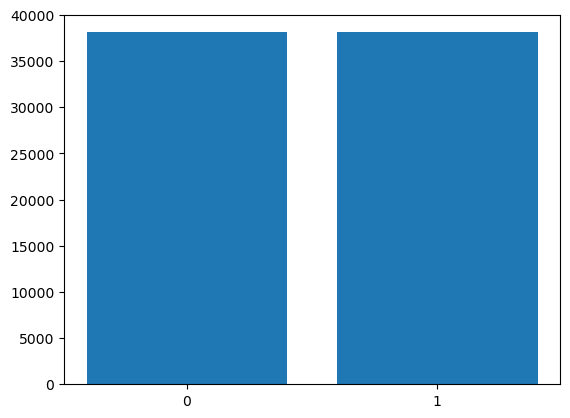

In [25]:
from imblearn.over_sampling import RandomOverSampler
X_over_train, y_over_train = RandomOverSampler().fit_resample(X_train, y_train)

plt.bar(y_over_train.value_counts().index, y_over_train.value_counts().values)
plt.xticks(y_over_train.value_counts().index)
plt.show()

In [26]:
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {'max_depth' : np.arange(5, 20, 2), 'min_samples_leaf' : np.arange(5, 20, 2), 'n_estimators' : np.arange(100, 500, 50)}
grid_rf_clf = GridSearchCV(rf_clf, param_grid, verbose = True, cv = 3, scoring='f1')
grid_rf_clf.fit(X_over_train, y_over_train)

Fitting 3 folds for each of 512 candidates, totalling 1536 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_leaf': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
             scoring='f1', verbose=True)

In [27]:
print('최적의 파라미터 :', grid_rf_clf.best_params_)

최적의 파라미터 : {'max_depth': 19, 'min_samples_leaf': 5, 'n_estimators': 400}


In [33]:
rf_clf = RandomForestClassifier(max_depth=19, min_samples_leaf=1, random_state=42, n_estimators=400)
rf_clf.fit(X_over_train, y_over_train)

y_pred = rf_clf.predict(X_test)
print('f1_score :', f1_score(y_test, y_pred))

f1_score : 0.5453029460811563


In [30]:
rf_clf = RandomForestClassifier(max_depth=19, min_samples_leaf=5, random_state=42, n_estimators=500)
rf_clf.fit(X_over_train, y_over_train)

y_pred = rf_clf.predict(X_test)
print('f1_score :', f1_score(y_test, y_pred))

f1_score : 0.5206185567010309
